Datos cargados exitosamente: (387, 10)
Entrenando con 309 tarjetas...
Probando con 78 tarjetas...
¡Modelo entrenado!

--- MÉTRICAS DEL MODELO ---
R2 Score (Precisión): 0.9300
MAE (Error Promedio): 1135.60

Modelo guardado en: c:\Users\hopu_\Desktop\proyecto_gpu_ml\models\gpu_predictor_model.pkl


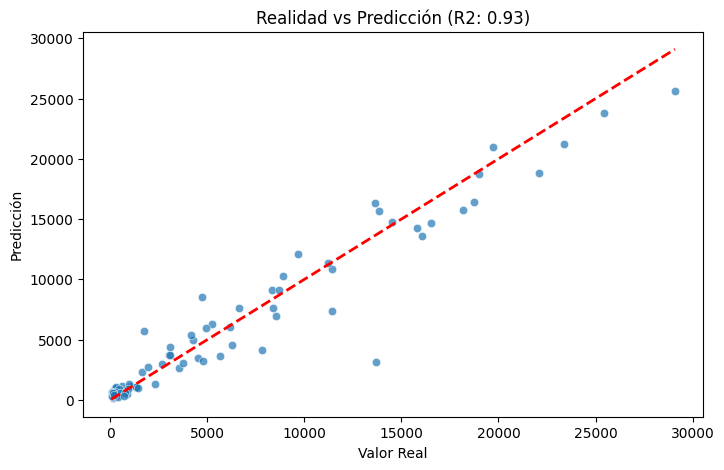

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
import os

# 1. CARGA DE DATOS LIMPIOS
# ---------------------------------------------------------
# Buscamos el archivo que acabas de crear
BASE_DIR = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(BASE_DIR, 'data', 'processed', 'gpu_cleaned.csv')

df = pd.read_csv(DATA_PATH)
print(f"Datos cargados exitosamente: {df.shape}")

# 2. SELECCIÓN DE VARIABLES (FEATURES)
# ---------------------------------------------------------
# Variables predictoras (X): Precio, TDP, G2Dmark y Eficiencia
X = df[['price', 'TDP', 'G2Dmark', 'price_per_watt']]
# Variable objetivo (y): Rendimiento G3Dmark
y = df['G3Dmark']

# 3. DIVISIÓN TRAIN / TEST (Requisito Rúbrica 4.3)
# Usamos el 20% para testear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenando con {len(X_train)} tarjetas...")
print(f"Probando con {len(X_test)} tarjetas...")

# 4. ENTRENAMIENTO (Requisito Rúbrica 4.3)
# Random Forest: Creamos 100 árboles de decisión para votar por el precio
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("¡Modelo entrenado!")

# 5. EVALUACIÓN Y MÉTRICAS
y_pred = model.predict(X_test)

# R2 Score: Qué tan bien explicamos la varianza (cerca de 1.0 es mejor)
r2 = r2_score(y_test, y_pred)
# MAE: Error promedio en puntos
mae = mean_absolute_error(y_test, y_pred)

print("\n--- MÉTRICAS DEL MODELO ---")
print(f"R2 Score (Precisión): {r2:.4f}")
print(f"MAE (Error Promedio): {mae:.2f}")

# 6. GUARDAR EL MODELO (Para la API)
# ---------------------------------------------------------
models_dir = os.path.join(BASE_DIR, 'models')
os.makedirs(models_dir, exist_ok=True) # Crea la carpeta si no existe

MODEL_PATH = os.path.join(models_dir, 'gpu_predictor_model.pkl')
joblib.dump(model, MODEL_PATH)
print(f"\nModelo guardado en: {MODEL_PATH}")

# Gráfico de Predicción vs Realidad
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Línea perfecta
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title(f'Realidad vs Predicción (R2: {r2:.2f})')
plt.show()